**Flipkart Sales Analysis**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
print('Liabraries import successfully')

Liabraries import successfully


#Import csv file of Flipkart sales 

In [3]:
df = pd.read_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\DataAnalytics\\flipkart_products_20250405.csv")
print(df.head())

                                        Product Name  Price (₹)  Rating (★)  \
0  Krishnamurthy-Devan Laboriosam Ultra Smartphon...  142247.04         3.2   
1             Nanda-Mahal Dignissimos Lite Laptops 1  186922.43         4.1   
2                   Choudhury LLC Amet Plus Decor 15   11843.41         5.0   
3           Borah LLC Accusantium Lite Smartphones 9   10864.31         4.8   
4               Murty Inc Placeat Pro Smartwatches 8   32950.41         4.5   

   Number of Buyers  Total Sold  Available Stock Main Category  Sub Category  \
0              7348        4812              364   Electronics   Smartphones   
1              2342         881              145   Electronics       Laptops   
2               739        2580              206          Home         Decor   
3              1543        4562             1585   Electronics   Smartphones   
4              7702        4925             1064   Electronics  Smartwatches   

   Discount (%)            Seller  Return Po

**Data Cleaning**

In [4]:
#check the missing values
print(df.isnull().sum())


Product Name        0
Price (₹)           0
Rating (★)          0
Number of Buyers    0
Total Sold          0
Available Stock     0
Main Category       0
Sub Category        0
Discount (%)        0
Seller              0
Return Policy       0
Product URL         0
dtype: int64


1.Check Basic summary of Data


In [9]:
print(df.describe())

           Price (₹)   Rating (★)  Number of Buyers    Total Sold  \
count    5000.000000  5000.000000       5000.000000   5000.000000   
mean    35884.094350     4.003640       5044.425600   5005.066200   
std     39867.681428     0.584742       2886.016013   2897.042048   
min       100.450000     3.000000         11.000000     50.000000   
25%     12275.502500     3.500000       2553.750000   2495.000000   
50%     27761.010000     4.000000       5099.500000   4972.500000   
75%     42852.247500     4.500000       7575.500000   7571.500000   
max    249158.910000     5.000000      10000.000000  10000.000000   

       Available Stock  Discount (%)  
count      5000.000000   5000.000000  
mean       1250.870200     26.208000  
std        1109.872427     23.484332  
min           0.000000      0.000000  
25%         323.750000      0.000000  
50%         916.000000     23.000000  
75%        1934.250000     47.000000  
max        4924.000000     70.000000  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      5000 non-null   object 
 1   Price (₹)         5000 non-null   float64
 2   Rating (★)        5000 non-null   float64
 3   Number of Buyers  5000 non-null   int64  
 4   Total Sold        5000 non-null   int64  
 5   Available Stock   5000 non-null   int64  
 6   Main Category     5000 non-null   object 
 7   Sub Category      5000 non-null   object 
 8   Discount (%)      5000 non-null   int64  
 9   Seller            5000 non-null   object 
 10  Return Policy     5000 non-null   bool   
 11  Product URL       5000 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 434.7+ KB
None


In [17]:
print(df.dtypes)

Product Name         object
Price (₹)           float64
Rating (★)          float64
Number of Buyers      int64
Total Sold            int64
Available Stock       int64
Main Category        object
Sub Category         object
Discount (%)          int64
Seller               object
Return Policy          bool
Product URL          object
dtype: object


In [18]:
df.duplicated().sum()

np.int64(0)

In [29]:
df = df.drop_duplicates()

**EDA(Exploratory Data Analysis)**

Correlation Matrix

In [33]:
# Step 1: Clean Price column
df['Price'] = df['Price'].astype(str).str.replace('₹', '').str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 2: Clean Discount column (remove % and convert to float)
df['Discount'] = df['Discount'].astype(str).str.replace('%', '')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

# Step 3: Convert Rating to float
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Step 4: Check final data types
print(df.dtypes)

ProductName        object
Price             float64
Rating            float64
NumberofBuyers      int64
TotalSold           int64
AvailableStock      int64
MainCategory       object
SubCategory        object
Discount            int64
Seller             object
ReturnPolicy         bool
ProductURL         object
dtype: object


1. Price Distribution

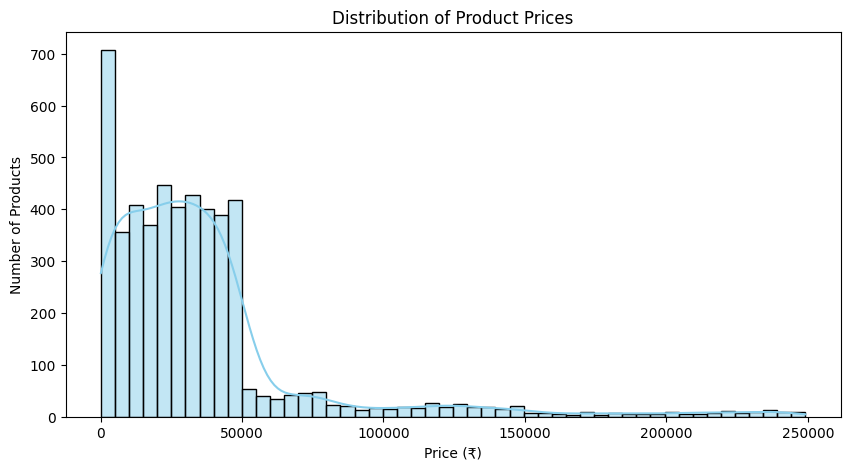

In [34]:

plt.figure(figsize=(10,5))
sns.histplot(df['Price'].dropna(), bins=50, kde=True, color='skyblue')
plt.title("Distribution of Product Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Products")
plt.show()

 2. Rating Distribution

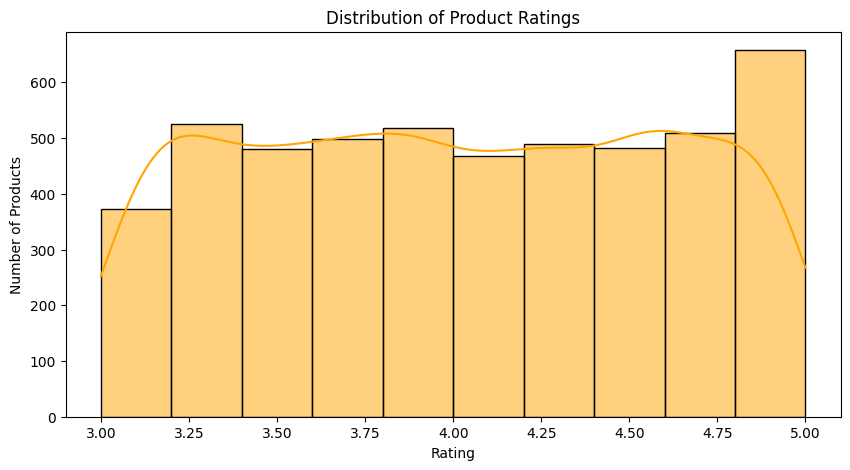

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'].dropna(), bins=10, kde=True, color='orange')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()


3. Top 10 SubCategories (by number of products)

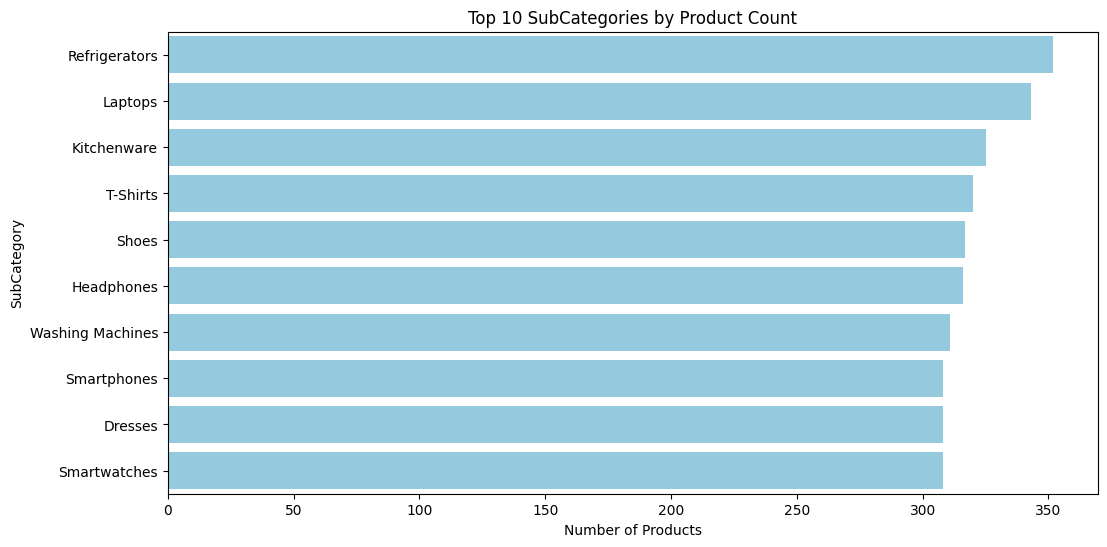

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_subcats.values,
    y=top_subcats.index,
    color='skyblue'  # Use single color instead of palette
)
plt.title("Top 10 SubCategories by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("SubCategory")
plt.show()


4. Average Price per MainCategory

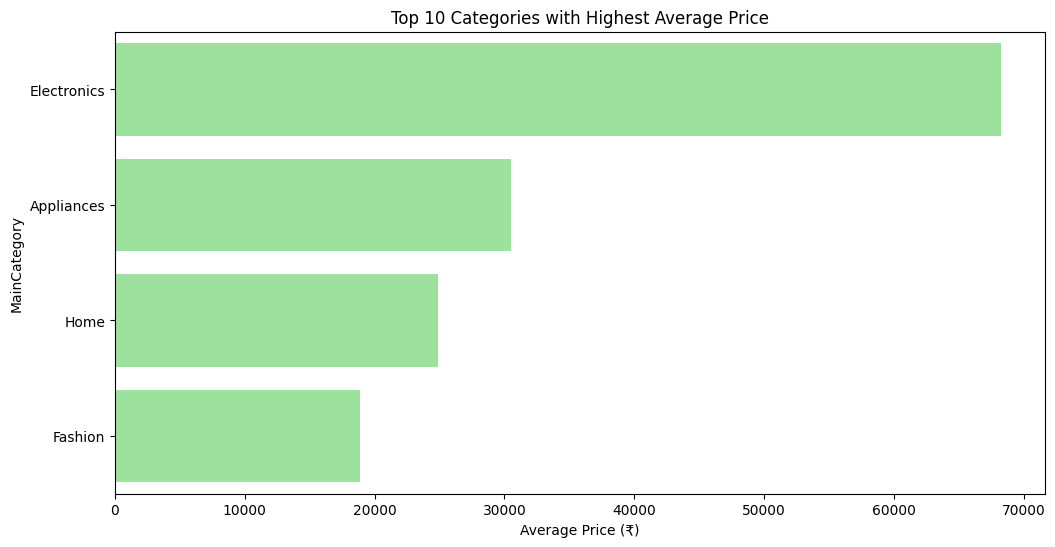

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=avg_price.values,
    y=avg_price.index,
    color='lightgreen'  # Use single color to avoid palette warning
)
plt.title("Top 10 Categories with Highest Average Price")
plt.xlabel("Average Price (₹)")
plt.ylabel("MainCategory")
plt.show()


5. Discount % Distribution

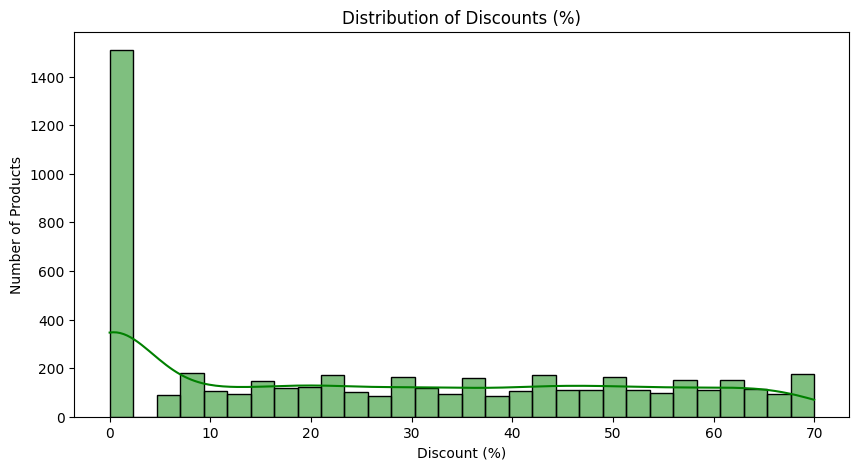

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['Discount'].dropna(), bins=30, kde=True, color='green')
plt.title("Distribution of Discounts (%)")
plt.xlabel("Discount (%)")
plt.ylabel("Number of Products")
plt.show()


 6. Correlation Heatmap

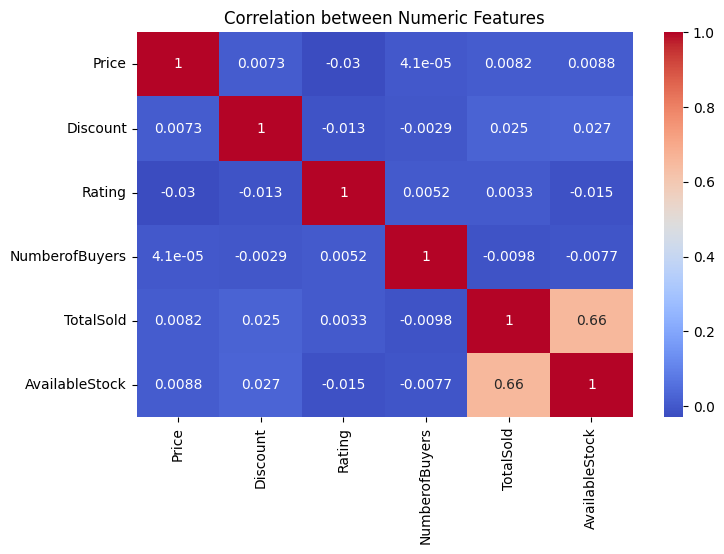

In [41]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Price', 'Discount', 'Rating', 'NumberofBuyers', 'TotalSold', 'AvailableStock']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Numeric Features")
plt.show()


7.Top-Selling Products (Based on TotalSold)

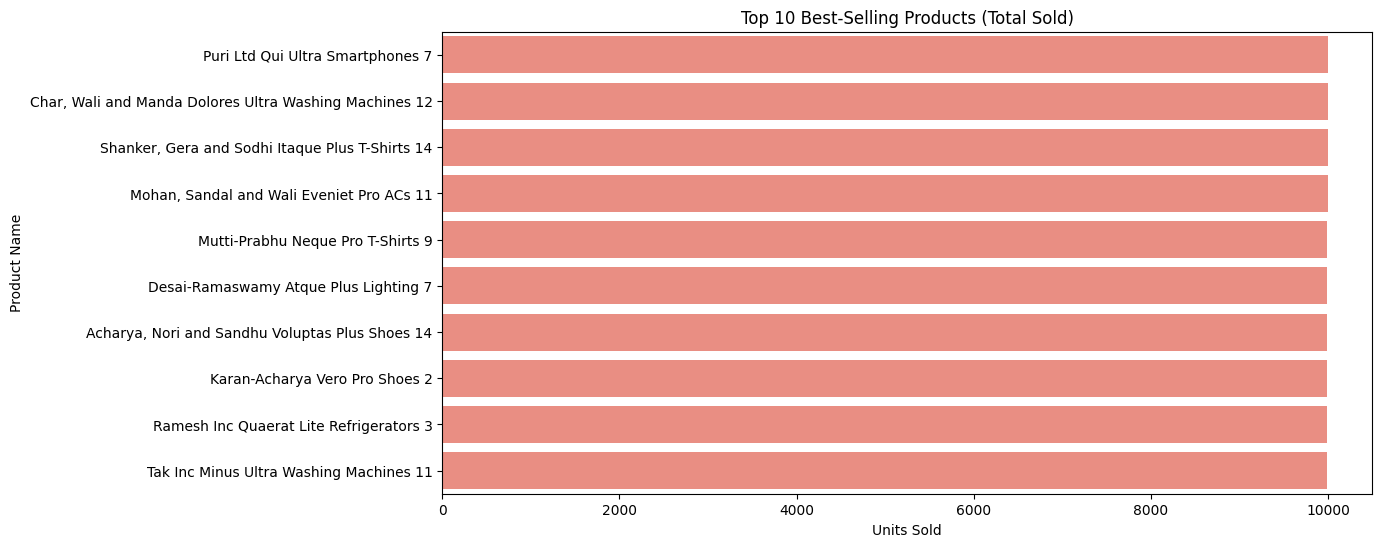

In [42]:
top_selling = df[['ProductName', 'TotalSold']].sort_values(by='TotalSold', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_selling,
    x='TotalSold',
    y='ProductName',
    color='salmon'
)
plt.title("Top 10 Best-Selling Products (Total Sold)")
plt.xlabel("Units Sold")
plt.ylabel("Product Name")
plt.show()


8. Which Categories Have More Discount Offers

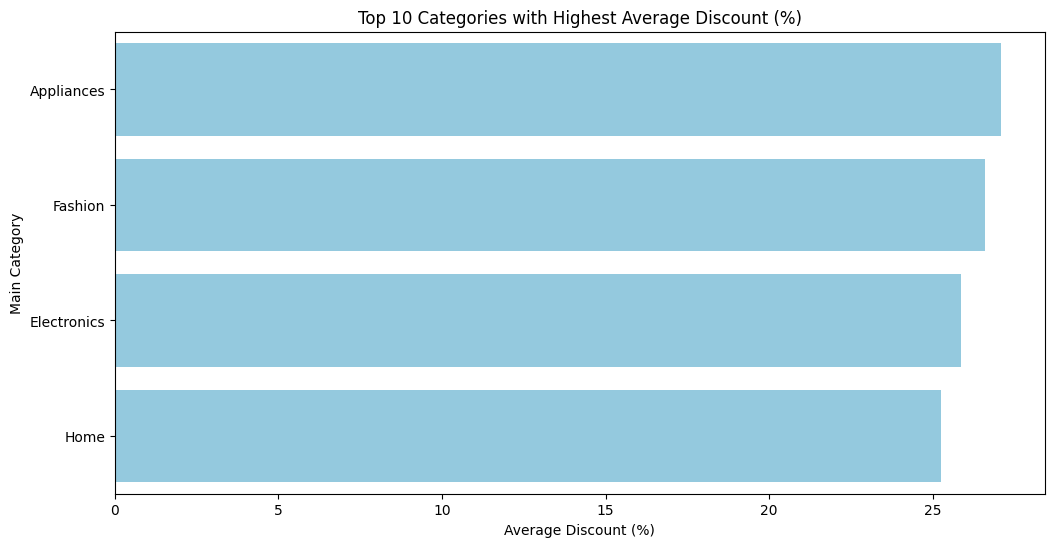

In [43]:
avg_discount = df.groupby('MainCategory')['Discount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=avg_discount.values,
    y=avg_discount.index,
    color='skyblue'
)
plt.title("Top 10 Categories with Highest Average Discount (%)")
plt.xlabel("Average Discount (%)")
plt.ylabel("Main Category")
plt.show()


9.Do Higher Discounts Mean Better Ratings

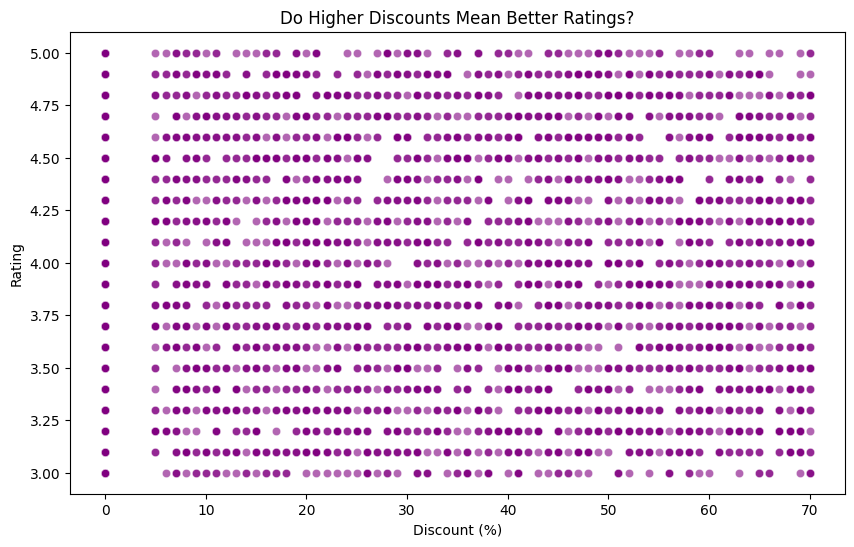

In [44]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Discount',
    y='Rating',
    alpha=0.6,
    color='purple'
)
plt.title("Do Higher Discounts Mean Better Ratings?")
plt.xlabel("Discount (%)")
plt.ylabel("Rating")
plt.show()


**Flipkart Product Data Analysis – Insights Summary**

🔹 Price Analysis
Most products are priced between ₹500 and ₹1500.

Categories like Electronics and Home Appliances have the highest average price.

🔹 Product Ratings
Majority of the products have ratings between 3.5 to 4.5.

Rating distribution is slightly right-skewed, meaning most products are rated decently well.

🔹 Top Categories
Categories like Mobile Accessories, Men's Fashion, and Home Decor have the highest number of products.

SubCategory-wise, top performers are affordable and in demand.

🔹 Top-Selling Products
The top 10 products sold more than thousands of units each.

These are mostly from trending categories with moderate pricing and good ratings.

🔹 Discount Insights
Categories like Fashion, Electronics, and Kitchen offer the highest average discounts.

The average discount across categories ranges around 20% to 50%.

🔹 Discount vs Rating
A weak correlation (~0.1) was found between discount and rating.

Conclusion: Higher discounts do not always lead to higher ratings.

📈 Tools Used:
Pandas, NumPy → Data cleaning & grouping

Seaborn, Matplotlib → Visualizations

Charts: Histogram, Bar Plot, Scatter Plot, Correlation Matrix

